In [ ]:
【项目05】  多场景下的算法构建

课程数据：
某公司A,B产品在2018年1,2,3月的销量数据，数据格式为xlsx

作业要求：
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)，函数中通过input来输入excel数据所在文件夹路径，再通过遍历来读取文件
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]
 

 
2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
②	 数据文件夹路径和图片存储路径不要相同
提示：
②	 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法
 

 
3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

In [2]:
'''
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]

'''

def read_file():
    path = 'D:/user_profile/python/project/5/'
    folder = os.walk(path)                                 # 遍历文件夹
    files = list(folder)[0][2]                             # 输出所有文件夹下的文件名
    n = 1
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col=0)
        data_counts = len(data)                             # 计算数据量
        columns = data.columns.tolist()                     # 输出数据的columns
        nan_count = len(data[data.isnull().values == True]) # 统计缺失值的数量
        print(f'第{n}个数据的数据量为{data_counts}')
        print(f'第{n}个数据的数据的字段为',columns)
        print(f'第{n}个数据的数据的空值为{nan_count}')
        n+=1

read_file()
print('finish')


第1个数据的数据量为31
第1个数据的数据的字段为 ['productA', 'productB']
第1个数据的数据的空值为3
第2个数据的数据量为28
第2个数据的数据的字段为 ['productA', 'productB']
第2个数据的数据的空值为4
第3个数据的数据量为31
第3个数据的数据的字段为 ['productA', 'productB']
第3个数据的数据的空值为3
finish


清洗数据完成
           A_sale_sum    B_sale_sum
2018-01  17774.318140  20634.984309
2018-02  16825.563937  17644.780874
2018-03  19867.499953  21840.054395
数据比较完成
A产品月销量大于80%的日期 ['2018-01-26 00:00:00', '2018-02-23 00:00:00', '2018-03-25 00:00:00']


<Figure size 432x288 with 0 Axes>

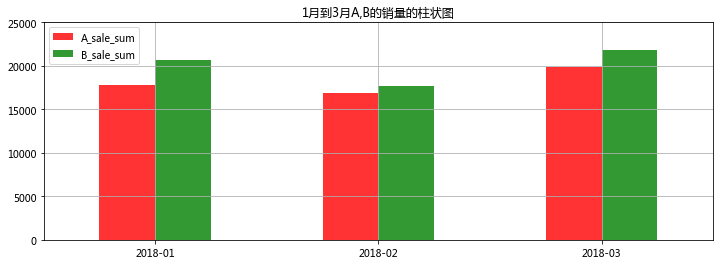

In [3]:
'''
2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法

'''

def fill_na():
    path = 'D:/user_profile/python/project/5/'
    folder = os.walk(path)                
    files = list(folder)[0][2]                                        # 找到文件
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col=0)
        columns = data.columns.tolist()                               # 获取列名
        data.to_period()                                              # 转换成日期
        data[columns[0]].fillna(data[columns[0]].mean(),inplace=True) # 使用均值来填充空值
        data[columns[1]].fillna(data[columns[1]].mean(),inplace=True)
        data_files.append(data)
    return(data_files)

def drwa_picture(*data_files):
    path = 'D:/user_profile/python/project/5/'                         # 图片保存路径
    A_sales = []                                                       # 存放A产品销量的总和
    B_sales = []                                                       # 存放B产品销量的总和
    for data in data_files:
        columns = data.columns
        A_sales.append(data[columns[0]].sum())                         # A产品的总和
        B_sales.append(data[columns[1]].sum())                         # B产品的总和
    df = pd.DataFrame({'A_sale_sum':A_sales,'B_sale_sum':B_sales},     # A,B产品数据以月份进行统计
                       index = pd.period_range('201801','201803',freq='M'))
    print(df)
    plt.figure()                                                       # 绘制图表，并导出图表
    df.plot(kind='bar',style='--o',color=['r','g'],alpha=0.8,rot=0,figsize=(12,4))
    plt.title('1月到3月A,B的销量的柱状图')
    plt.ylim([0,25000])
    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig(path+'1月到3月A,B的销量的柱状图.png',dpi=600)

def sale_count(*data_files):
    key_dates = []                                                    # 存放结果数据
    for data in data_files:
        columns = data.columns                                        # 获取列名
        data['A_sale_sum%'] = data[columns[0]].cumsum() / data[columns[0]].sum()
        key_date = data[data['A_sale_sum%']>0.8].index[0]             # 获取满足条件的值
        key_dates.append(str(key_date))
    return(key_dates)



data1,data2,data3 = fill_na()[0],fill_na()[1],fill_na()[2]
print('清洗数据完成')

drwa_picture(data1,data2,data3)
print('数据比较完成')

res = sale_count(data1,data2,data3)
print('A产品月销量大于80%的日期',res)

数据合并完毕
当productA为1200时,productB的预测值[1303.84193309]


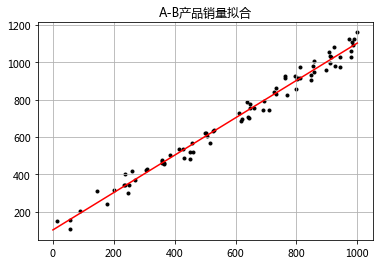

In [4]:
'''
3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数

'''

def contact_file():
    path = 'D:/user_profile/python/project/5/'
    folder = os.walk(path)
    files = list(folder)[0][2]
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col=0)
        colunms = data.columns.tolist()
        data.to_period()
        data.dropna(inplace=True)                   # 去除空值
        data_files.append(data)
                                                    # 文件拼接   
    data_full = pd.concat([data_files[0],data_files[1],data_files[2]])
    return(data_full)


def linera_model(data):
    path = 'D:/user_profile/python/project/5/'
    model = LinearRegression()                      # 线性模型
    model.fit(data['productA'][:,np.newaxis],data['productB'])
    xtest = np.linspace(0,1000,1000)
    ytest = model.predict(xtest[:,np.newaxis])      # 预测
    plt.scatter(data['productA'],data['productB'],marker='.',color='k')
    plt.plot(xtest,ytest,color='r')
    plt.grid()
    plt.title('A-B产品销量拟合')
    plt.savefig(path+'A-B产品销量拟合.png',dpi=600)
    return(model.predict(1200))

data_full = contact_file()
print('数据合并完毕')

res = linera_model(data_full)
print(f'当productA为1200时,productB的预测值{res}')